# Notebook to make Fig. 9: PP plots

In [1]:
# Import necessary packages & set-up plotting aesthetics
import numpy as np 
import pylab
import pandas as pd
from scipy.stats import gaussian_kde
import json

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style

from fig_helper_functions import plot_pp_error_bars

style.use('plotting.mplstyle')

import seaborn as sns
sns.set_palette('colorblind')

f_root = '/home/simona.miller/measuring-bbh-component-spin/Data/PopulationInferenceOutput/'
#sys.path.append(f_root)
#from helper_functions_pp import * 

### Load data

In [2]:
# Reweighted PE samples individual events

rw_name = f_root+'for_pp_plots/102723_reweighted_to_truth.json'
with open(rw_name, 'r') as f:
    sampleDicts = json.load(f)

### Make PP Plots

In [3]:
pop_names = ['1', '2', '3']
param_list = ['chi1', 'chi2', 'cost1', 'cost2', 'm1', 'm2', 'z']

PP_dict = {}

for pop in pop_names:
    
    PP_dict_pop = {}
    
    # unpack inputs
    sampleDict = sampleDicts[pop]
    
    events = [k for k in sampleDict.keys()]
            
    for param in param_list: 
        
        posterior_P = []
        
        for event in events: 
            
            true_val = sampleDict[event]['injected_params'][param.replace('chi', 'a')]
            posterior =  np.asarray(sampleDict[event][param])
                        
            # get CI
            CI = sum(posterior<true_val)/len(posterior)
            posterior_P.append(CI)
            
        N = len(posterior_P)
        CIs = np.linspace(0,1,N)
        
        Ps = [sum(posterior_P < CI)/N for CI in CIs]
        
        PP_dict_pop[param] = {'x':CIs, 'y':Ps}
        
    PP_dict[pop] = PP_dict_pop

320
329
303


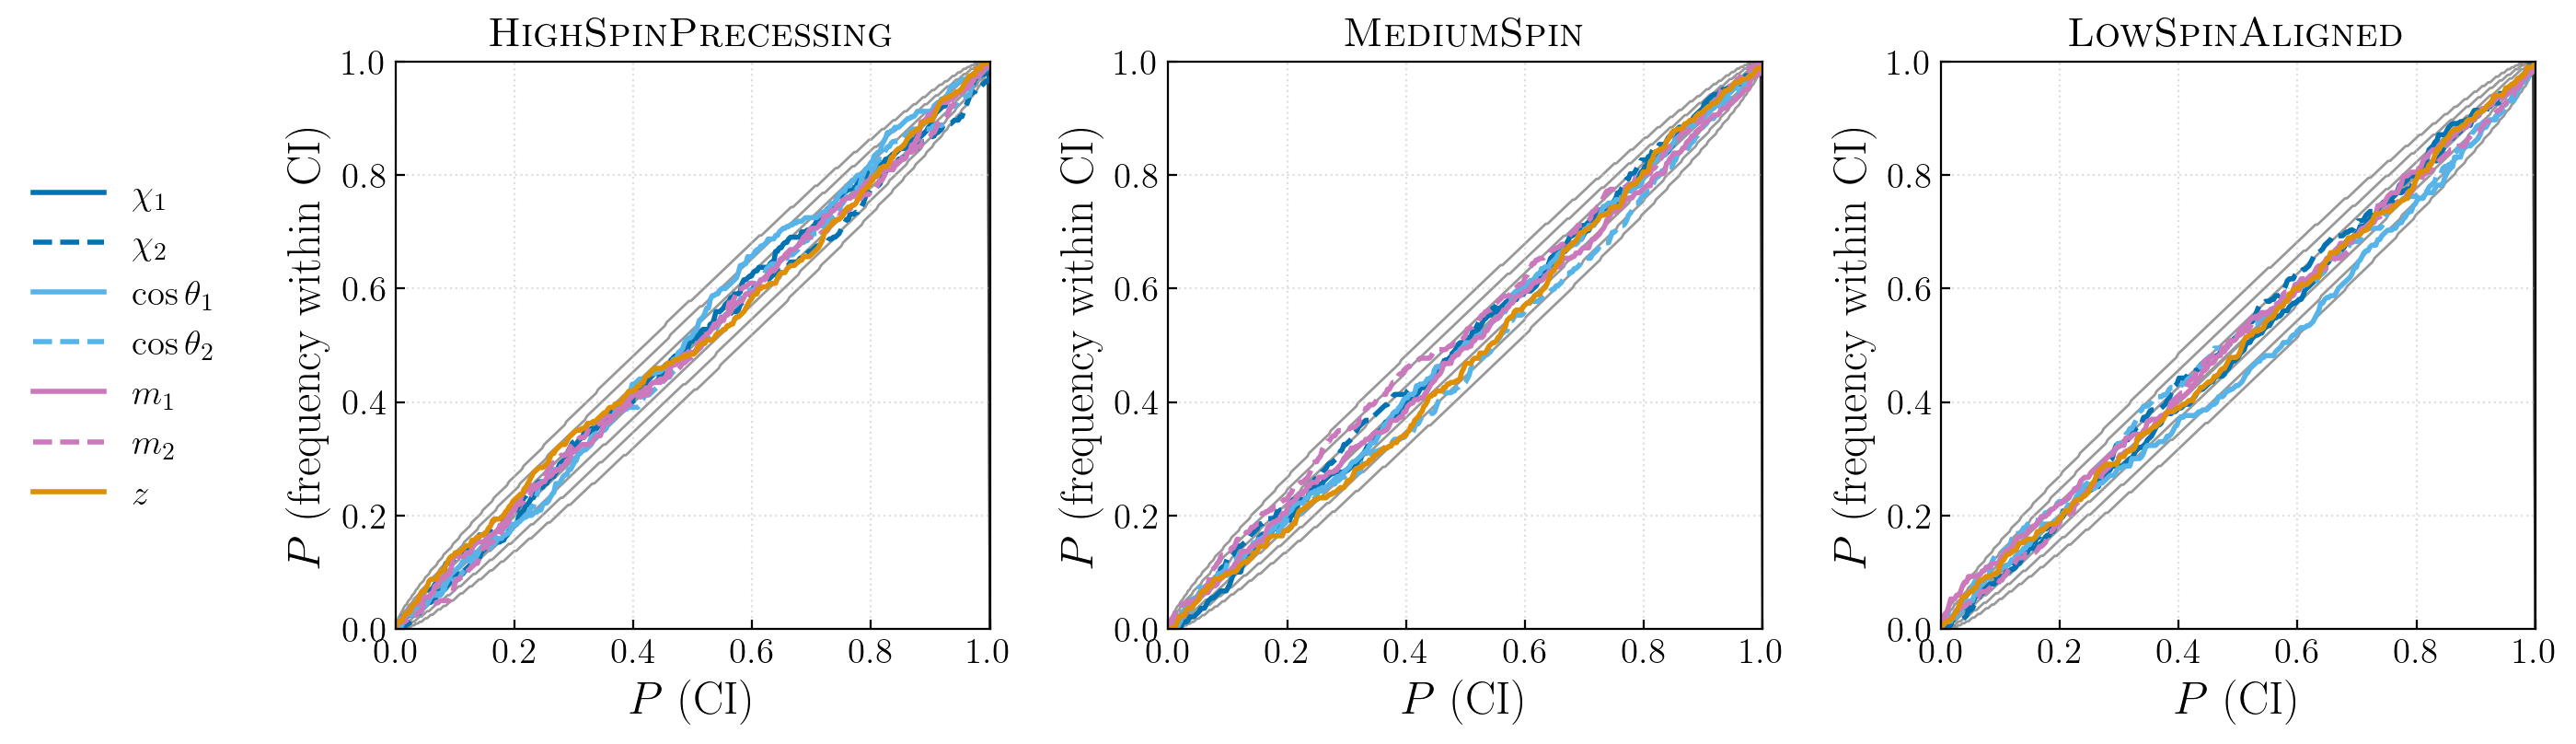

In [8]:
ncol = len(pop_names)
fig, axes = plt.subplots(1, ncol, figsize=(ncol*5,4))

colors = ['C0', 'C0', 'C9', 'C9', 'C4', 'C4', 'C1']
lbls = [r'$\chi_1$', r'$\chi_2$', r'$\cos\theta_1$', r'$\cos\theta_2$', r'$m_1$', r'$m_2$', '$z$']
pop_lbls = labels = [r'$\mathrm{\textsc{HighSpinPrecessing}}$', r'$\mathrm{\textsc{MediumSpin}}$', r'$\mathrm{\textsc{LowSpinAligned}}$']

for ax, pop, pop_lbl in zip(axes, pop_names, pop_lbls):
        
    for c, param, lbl in zip(colors, param_list, lbls): 
        
        xs = np.sort(PP_dict[pop][param]['x'])
        ys = np.sort(PP_dict[pop][param]['y'])
        
        ls='--' if '2' in param else '-'
        
        # plot trace for this parameter
        ax.plot(xs, ys, label=lbl, lw=2, ls=ls, color=c, zorder=2, alpha=1)
    
    # add standard error bars for comparison
    N = len(xs)
    print(N)
    plot_pp_error_bars(ax, N, number_x_values=N+1)

    # format axes
    ax.plot([0,1], [0,1], color='k', alpha=0.4, zorder=1)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$P$ (CI)')
    ax.set_ylabel('$P$ (frequency within CI)')
    ax.set_title(pop_lbl, fontsize=16)
    ax.grid(ls=':', color='silver', alpha=0.5)

axes[0].legend(bbox_to_anchor=(-0.25, 0.5), loc="center right")
    
plt.subplots_adjust(wspace=0.3)

plt.savefig('figure_09.pdf',bbox_inches='tight')
plt.show()